In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [2]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [5]:
plt.style.use('seaborn-whitegrid')

In [6]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '{:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

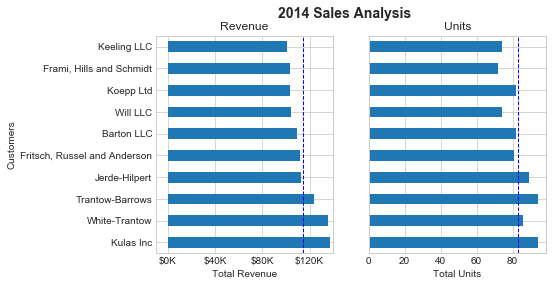

In [23]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
ax0.set_xticks(range(0,160000,40000))

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

# Since we have the fig object, we can save the figure using multiple options:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

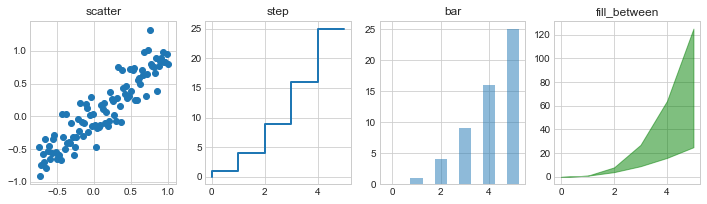

In [39]:
x = np.array([0,1,2,3,4,5])
n = x
xx = np.linspace(-0.75, 1., 100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");